# Feature Engineering

Feature engineering: Taking whatever information we have about our problem and turning it into numbers that we can use to build our features matrix.

In this section, we will cover a few common examples of feature engineering tasks: features for representing categorical data, features for representing text, and features for representing images. Additionally, we will discuss derived features for increasing model complexity and imputation of missing data. Often this process is known as vectorization, as it involves converting arbitrary data into well-behaved vectors.

__Import libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

---

## Categorical Features

Given data:

In [2]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

We are tempted to make categorization by doing this:

In [3]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

Is it a good procedure? No, because if we are doing this than unspecifically we say that Fremont is better than Queen Anne (if we think 2 is better than 1)

Better procedure is by using onehotencoder or DictVertorizer

In [5]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int32)

In [6]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [9]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

---

## Text Features

We encode the text as numbers. The simples method of encoding data is by word counts.

In [10]:
sample = ['problem of evil',
    'evil queen',
    'horizon problem']

In [17]:
# Using scikit learn
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

scipy.sparse.csr.csr_matrix

In [16]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


There are some issues with this approach, however: the raw word counts lead to features that put too much weight on words that appear very frequently, and this can be suboptimal in some classification algorithms. One approach to fix this is known as term frequency–inverse document frequency (TF–IDF), which weights the word counts by a measure of how often they appear in the documents. The syntax for computing these features is similar to the previous example:

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


---

## Derived Features

For example, this data clearly cannot be well described by a straight line:

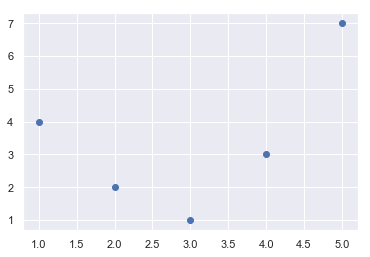

In [20]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

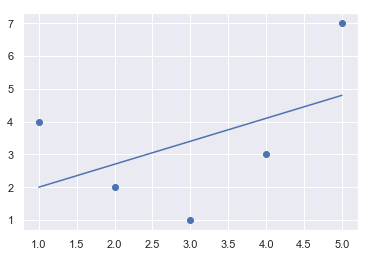

In [21]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(X, y)
plt.plot(X, yfit);

It’s clear that we need a more sophisticated model to describe the relationship between x and y. We can do this by transforming the data, adding extra columns of features to drive more flexibility in the model. For example, we can add polynomial features to the data this way:

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


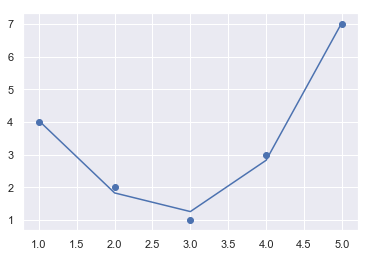

In [26]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(X, y)
plt.plot(X, yfit);

---

## Imputation of Missing Data

In [28]:
from numpy import nan
X = np.array([[ nan, 0, 3 ],
              [ 3, 7, 9 ],
              [ 3, 5, 2 ],
              [ 4, nan, 6 ],
              [ 8, 8, 1 ]])
y = np.array([14, 16, -1, 8, -5])

When applying a typical machine learning model to such data, we will need to first replace such missing data with some appropriate fill value. This is known as imputation of missing values, and strategies range from simple (e.g., replacing missing values with the mean of the column) to sophisticated (e.g., using matrix completion or a robust model to handle such data).

In [36]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [38]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

---

## Feature Pipelines

Processing pipeline: <br>
1. Impute missing values using the mean
2. Transform features to quadratic
3. Fit a linear regression <br> <br>
To simplify the process pipeline, sklearn provides us a pipeline object

In [40]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                     PolynomialFeatures(degree=2),
                     LinearRegression())

In [41]:
model.fit(X, y)    # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
